In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
def build_generator(latent_dim):
    model = Sequential([
        Dense(128,input_dim=latent_dim,activation='relu'),
        Dense(784,activation='sigmoid'),
        Reshape((28,28))
    ])
    return model

In [3]:
def build_discriminator(img_shape):
    model = Sequential([
        Flatten(input_shape=img_shape),
        Dense(128,activation='relu'),
        Dense(1,activation='sigmoid')
    ])
    return model

In [4]:
def build_gan(generator,discrimination):
    discriminator.trainable = False
    model = Sequential([generator,discriminator])
    return model

In [5]:
(x_train,_),(_,_) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
latent_dim = 100
img_shape = (28,28)
generator = build_generator(latent_dim)
discriminator = build_discriminator(img_shape)
gan = build_gan(generator,discriminator)

In [7]:
discriminator.compile(optimizer=Adam(learning_rate=0.0002),loss='binary_crossentropy',
                     metrics=['accuracy'])
gan.compile(optimizer=Adam(learning_rate=0.0002),loss='binary_crossentropy')

In [8]:
batch_size = 64
epochs = 30000
sample_interval = 1000

2/2 [==============================] - 3s 9ms/step
Epoch 0, D Loss: 0.8200506567955017, G Loss: 0.50406414270401


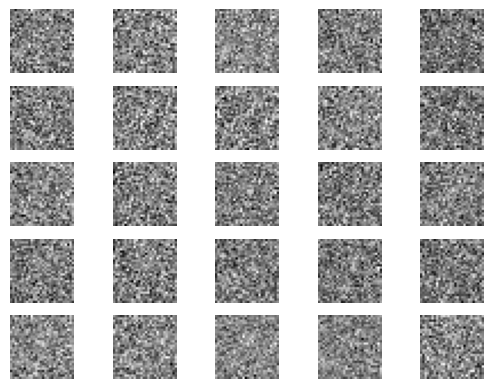

2/2 [==============================] - 0s 4ms/step
Epoch 1000, D Loss: 0.833755761384964, G Loss: 0.49966710805892944


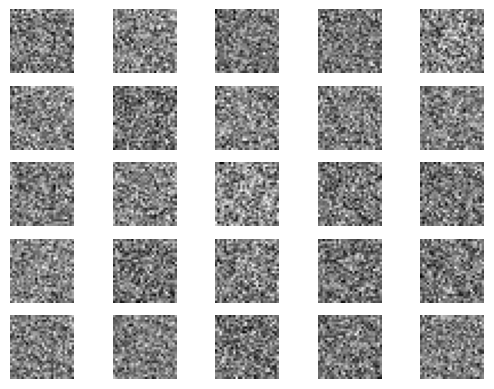

2/2 [==============================] - 0s 2ms/step
Epoch 2000, D Loss: 0.8236333131790161, G Loss: 0.5022673606872559


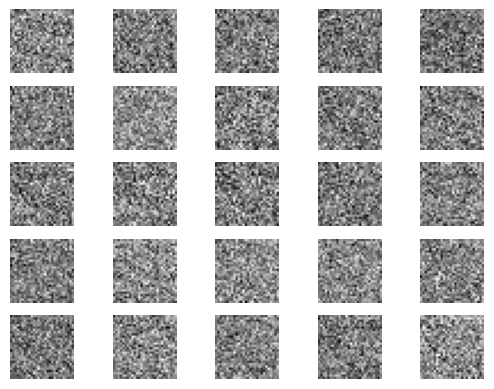

2/2 [==============================] - 0s 6ms/step
Epoch 3000, D Loss: 0.8098226189613342, G Loss: 0.5018783807754517


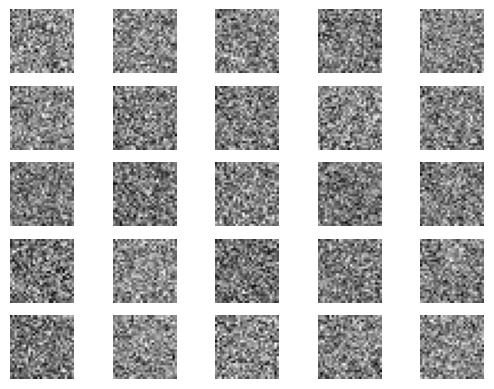

2/2 [==============================] - 0s 10ms/step
Epoch 4000, D Loss: 0.8189179599285126, G Loss: 0.4953339695930481


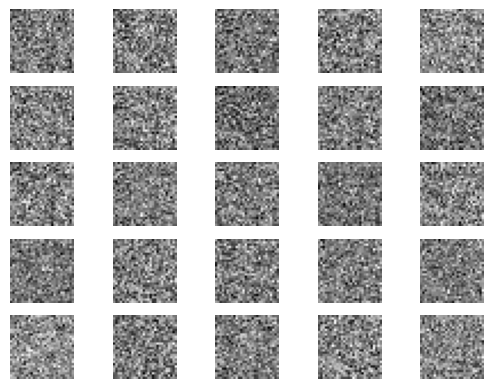

2/2 [==============================] - 0s 12ms/step
Epoch 5000, D Loss: 0.8311842381954193, G Loss: 0.4940934181213379


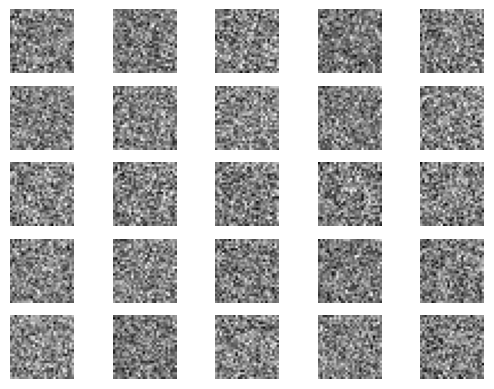

2/2 [==============================] - 0s 5ms/step
Epoch 6000, D Loss: 0.8331733345985413, G Loss: 0.49850359559059143


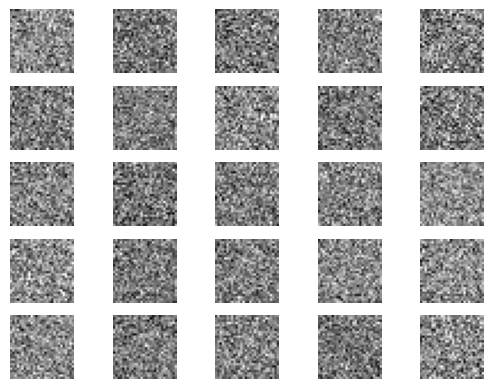

2/2 [==============================] - 0s 7ms/step
Epoch 7000, D Loss: 0.8053391873836517, G Loss: 0.49998265504837036


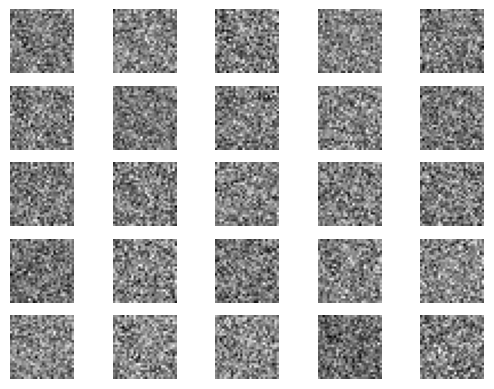

2/2 [==============================] - 0s 4ms/step
Epoch 8000, D Loss: 0.8366272151470184, G Loss: 0.4913446009159088


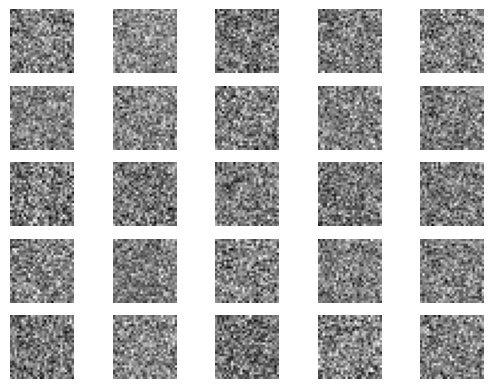

2/2 [==============================] - 0s 14ms/step
Epoch 9000, D Loss: 0.8344539999961853, G Loss: 0.4903082847595215


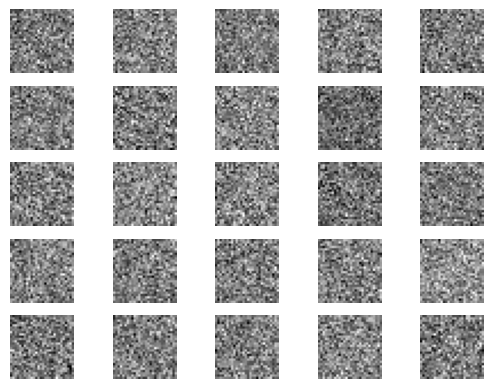

2/2 [==============================] - 0s 5ms/step
Epoch 10000, D Loss: 0.8143087923526764, G Loss: 0.5016324520111084


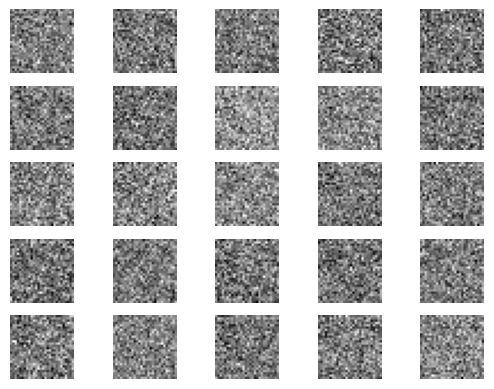

2/2 [==============================] - 0s 5ms/step
Epoch 11000, D Loss: 0.8272888362407684, G Loss: 0.5008105635643005


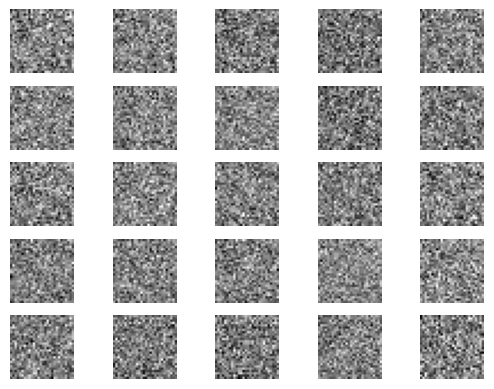

2/2 [==============================] - 0s 4ms/step
Epoch 12000, D Loss: 0.8225192427635193, G Loss: 0.4989856481552124


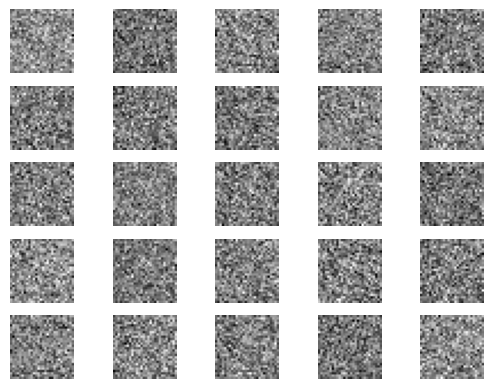

2/2 [==============================] - 0s 3ms/step
Epoch 13000, D Loss: 0.8172357678413391, G Loss: 0.49170982837677


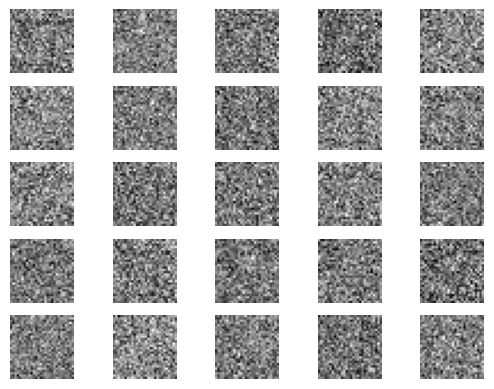

2/2 [==============================] - 0s 3ms/step
Epoch 14000, D Loss: 0.8399276733398438, G Loss: 0.4914849102497101


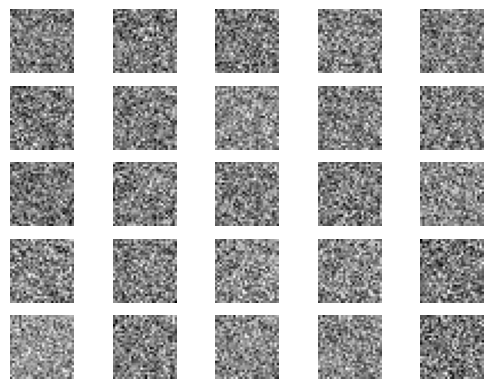

2/2 [==============================] - 0s 3ms/step
Epoch 15000, D Loss: 0.821919322013855, G Loss: 0.4999025762081146


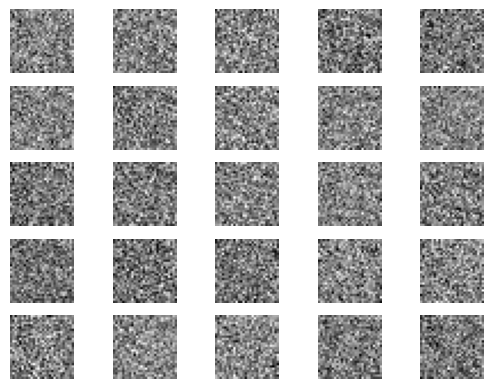

2/2 [==============================] - 0s 3ms/step
Epoch 16000, D Loss: 0.8160997331142426, G Loss: 0.5010101795196533


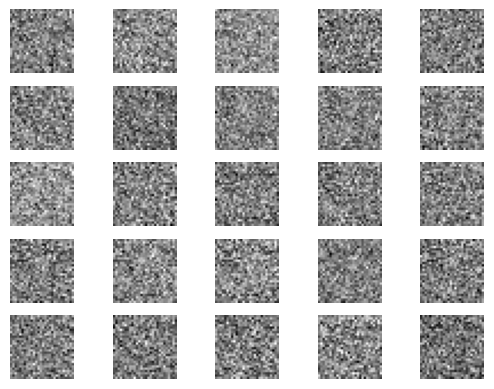

2/2 [==============================] - 0s 3ms/step
Epoch 17000, D Loss: 0.8067648410797119, G Loss: 0.49895626306533813


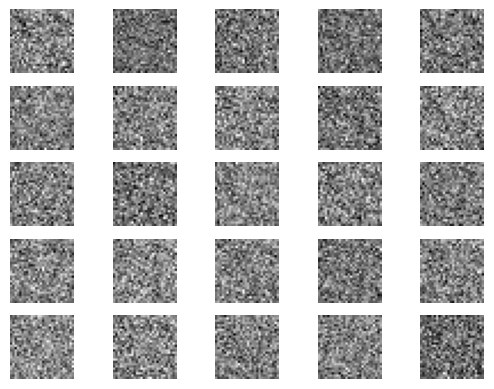

2/2 [==============================] - 0s 4ms/step
Epoch 18000, D Loss: 0.8253911733627319, G Loss: 0.4914160668849945


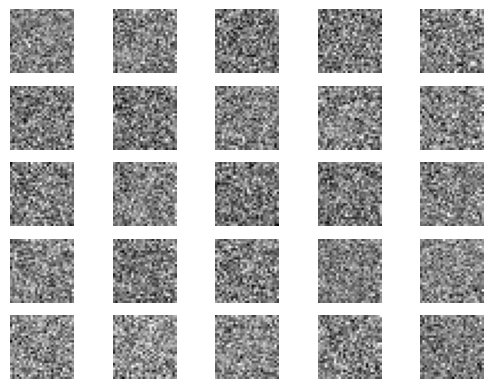

2/2 [==============================] - 0s 3ms/step
Epoch 19000, D Loss: 0.8239542543888092, G Loss: 0.49817222356796265


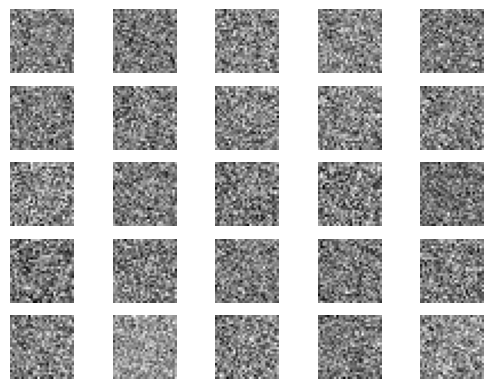

2/2 [==============================] - 0s 3ms/step
Epoch 20000, D Loss: 0.8402454257011414, G Loss: 0.49747976660728455


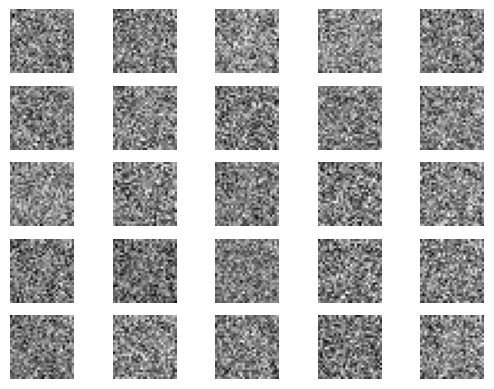

2/2 [==============================] - 0s 3ms/step
Epoch 21000, D Loss: 0.8303678333759308, G Loss: 0.5029088258743286


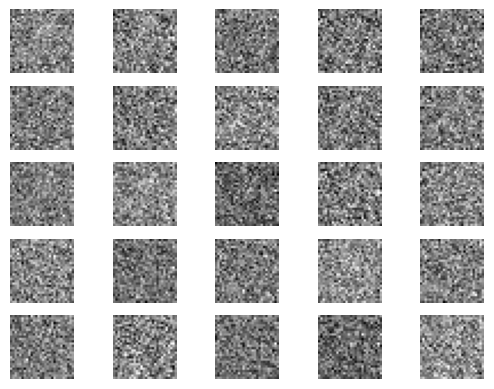

2/2 [==============================] - 0s 3ms/step


KeyboardInterrupt: ignored

In [9]:
for epoch in range(epochs):
    noise = np.random.normal(0,1,(batch_size,latent_dim))
    generated_images = generator.predict(noise)

    idx = np.random.randint(0,x_train.shape[0],batch_size)
    real_images = x_train[idx]

    d_loss_real = discriminator.train_on_batch(real_images,np.ones((batch_size,1)))
    d_loss_fake = discriminator.train_on_batch(generated_images,np.zeros((batch_size,1)))
    d_loss = 0.5 * np.add(d_loss_real,d_loss_fake)

    noise = np.random.normal(0,1,(batch_size,latent_dim))
    g_loss = gan.test_on_batch(noise,np.ones((batch_size,1)))

    if epoch % sample_interval == 0:
        print(f'Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}')

        r,c = 5,5
        generated_images = 0.5 * generated_images + 0.5
        fig,axs = plt.subplots(r,c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(generated_images[cnt],cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.show()